In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [7]:
!pip install -q gdown

# Descargar el archivo ZIP con el ID correcto
!gdown --id 1lRGX9-wSWqcBrCA6G2UgTjNCyTYtj1wS -O Set-Original.zip
!unzip -q Set-Original.zip -d letras_data
!ls letras_data

# español https://drive.google.com/file/d/1Gzew6mDwT2y-Bftk_eTyCJDTK5B9d7Mq/view?usp=sharing
# griego https://drive.google.com/file/d/1lRGX9-wSWqcBrCA6G2UgTjNCyTYtj1wS/view?usp=sharing


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lRGX9-wSWqcBrCA6G2UgTjNCyTYtj1wS
To: /content/Set-Original.zip
100% 1.10M/1.10M [00:00<00:00, 9.16MB/s]
Set-Original


In [8]:
!ls letras_data/Set-Original/


Dataset


In [9]:
import os
import cv2
import numpy as np

X = []
y = []

base_dir = 'letras_data/Set-Original/Dataset'

for letra in sorted(os.listdir(base_dir)):
    ruta_letra = os.path.join(base_dir, letra)
    if not os.path.isdir(ruta_letra):
        continue

    # for tipo in ['may', 'min']:
    #     ruta_tipo = os.path.join(ruta_letra, tipo)
    #     if not os.path.isdir(ruta_tipo):
    #         continue

    for archivo in os.listdir(ruta_letra):
        if archivo.endswith('.png'):
            img_path = os.path.join(ruta_letra, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            img = img / 255.0

            etiqueta = letra.lower()

            X.append(img)
            y.append(etiqueta)

X = np.array(X)
y = np.array(y)

np.save('X_letras.npy', X)
np.save('y_letras.npy', y)

print("Guardado exitoso:", X.shape, y.shape)

Guardado exitoso: (2400, 28, 28) (2400,)


Shape de X: (2400, 28, 28)
Shape de y: (2400,)
Etiquetas únicas: ['alpha' 'epsilon' 'kappa' 'nu' 'rho' 'upsilon']


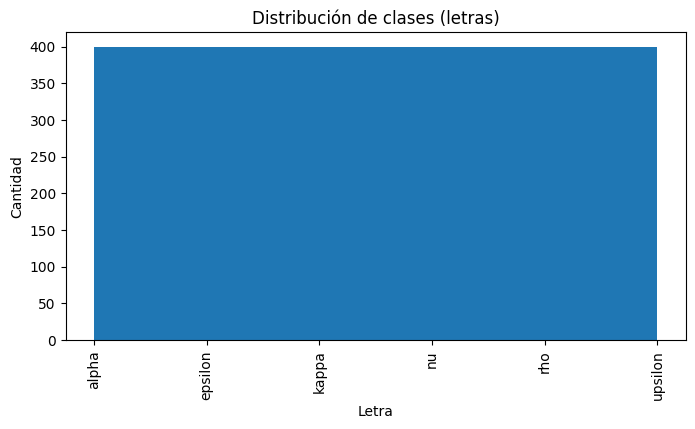

In [10]:

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Etiquetas únicas:", np.unique(y))

# Histograma de distribución de clases
plt.figure(figsize=(8,4))
plt.hist(y, bins=len(np.unique(y)))
plt.title("Distribución de clases (letras)")
plt.xlabel("Letra")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()


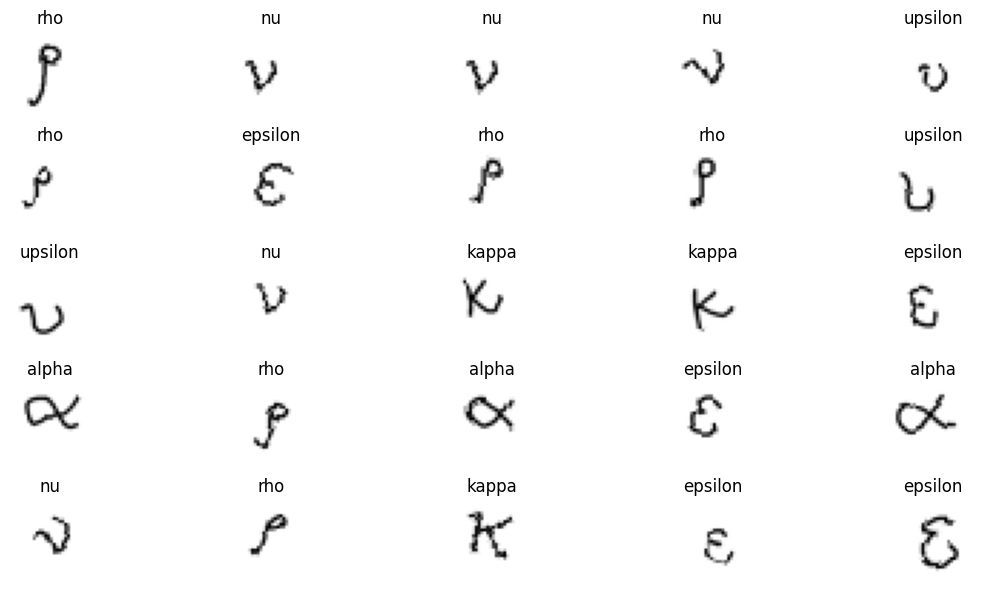

In [11]:
plt.figure(figsize=(12,6))
for i in range(25):
    idx = np.random.randint(0, X.shape[0])
    plt.subplot(5,5,i+1)
    plt.title(y[idx])
    plt.imshow(X[idx], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
import numpy as np

X = np.load('X_letras.npy')
y = np.load('y_letras.npy')

print(X.shape)  # (N, 28, 28)
print(y.shape)  # (N,)
print(np.unique(y))  # Verifica letras disponibles


(2400, 28, 28)
(2400,)
['alpha' 'epsilon' 'kappa' 'nu' 'rho' 'upsilon']


In [13]:

# Convertir letras a números únicos (ej. 'A'→0, 'b'→1, ...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Puedes revertir con: le.inverse_transform([0, 1, 2, ...])


In [14]:


# Separar 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Expandir dimensión para canal (grises)
if X_train.ndim == 3:
    X_train = X_train[..., None]
    X_test = X_test[..., None]


In [15]:


num_clases = len(np.unique(y_encoded))  # Total de letras

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_clases, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,030 (941.52 KB)

 Trainable params: 241,030 (941.52 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
log = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=16
)


Epoch 1/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2042 - loss: 1.7719 - val_accuracy: 0.5979 - val_loss: 1.2635
Epoch 2/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6794 - loss: 0.9556 - val_accuracy: 0.8417 - val_loss: 0.4356
Epoch 3/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8677 - loss: 0.3687 - val_accuracy: 0.9042 - val_loss: 0.2684
Epoch 4/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.2631 - val_accuracy: 0.8938 - val_loss: 0.2829
Epoch 5/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9345 - loss: 0.2035 - val_accuracy: 0.9375 - val_loss: 0.1667
Epoch 6/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9614 - loss: 0.1229 - val_accuracy: 0.9604 - val_loss: 0.1245
Epoch 7/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9638 - loss: 0.1012 - val_accuracy: 0.9583 - val_loss: 0.1344
Epoch 8/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9776 - loss: 0.0862 - val_accuracy: 0.9688 - val_loss

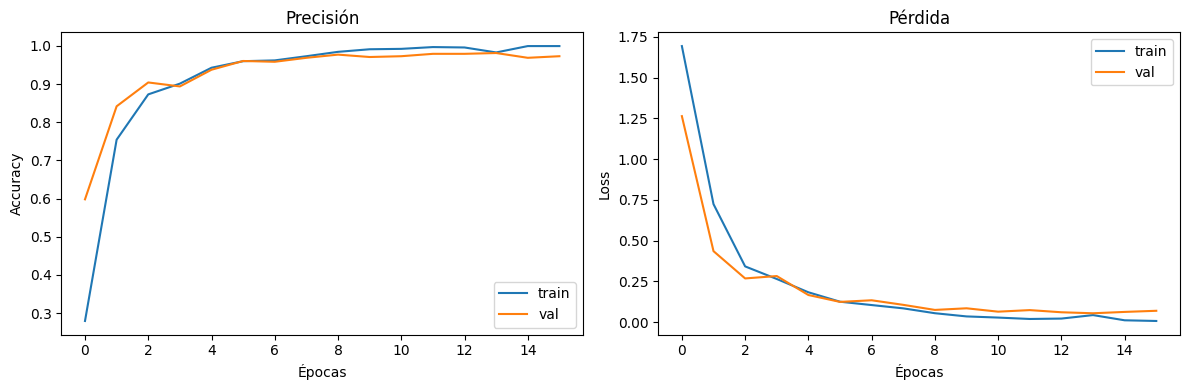

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'], label='train')
plt.plot(log.history['val_accuracy'], label='val')
plt.title('Precisión')
plt.xlabel('Épocas'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='val')
plt.title('Pérdida')
plt.xlabel('Épocas'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


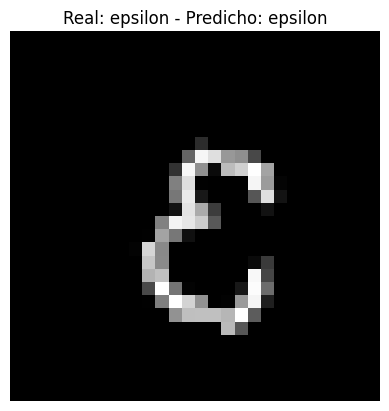

In [18]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]

# Predecir
salida = model.predict(im[None, :, :, :])[0]
pred_index = np.argmax(salida)
pred_letra = le.inverse_transform([pred_index])[0]
real_letra = le.inverse_transform([label])[0]

# Mostrar
plt.title(f"Real: {real_letra} - Predicho: {pred_letra}")
plt.imshow(-im[:, :, 0], cmap='gray')
plt.axis('off')
plt.show()


In [19]:
# guardar modelo
model.save('models/modelo_letras_g.h5')
print("Modelo guardado como ../models/modelo_letras_g.h5")


Modelo guardado como ../models/modelo_letras_g.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


<Figure size 1000x1000 with 0 Axes>

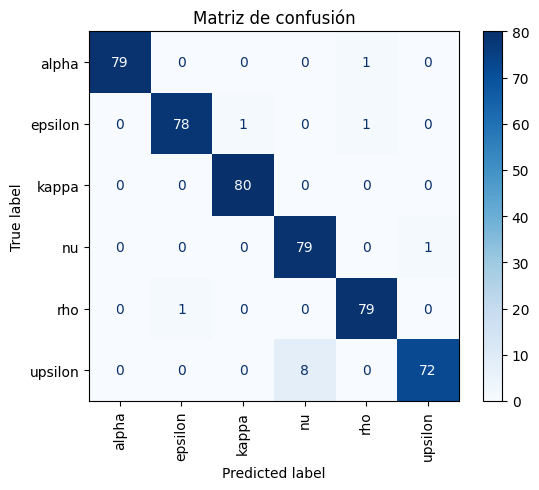

Reporte de clasificación:
               precision    recall  f1-score   support

       alpha       1.00      0.99      0.99        80
     epsilon       0.99      0.97      0.98        80
       kappa       0.99      1.00      0.99        80
          nu       0.91      0.99      0.95        80
         rho       0.98      0.99      0.98        80
     upsilon       0.99      0.90      0.94        80

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Predecir clases sobre todo el set de test
y_pred_proba = model.predict(X_test)                # salida de probabilidad
y_pred = np.argmax(y_pred_proba, axis=1)             # índice de la clase predicha

# 2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
plt.figure(figsize=(10,10))
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title("Matriz de confusión")
plt.show()

# 3. Informe de clasificación (precision, recall, f1-score)
report = classification_report(y_test, y_pred,
                               target_names=le.classes_)
print("Reporte de clasificación:\n", report)


In [ ]:
# Cargar el modelo
from tensorflow.keras.models import load_model

model_cargado = load_model('../models/modelo_letras.h5')
print("Modelo cargado correctamente")
model_cargado.summary()


Modelo cargado correctamente


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,224 (965.72 KB)

 Trainable params: 247,222 (965.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)